In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

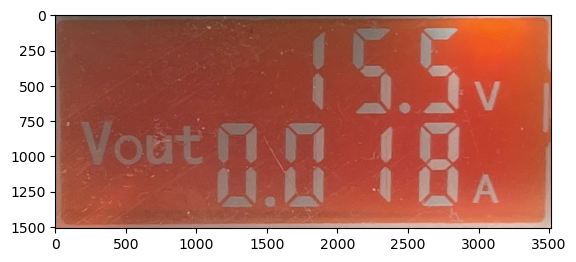

In [2]:
# 读取图像
os.chdir(r'/Users/hyx020222/Documents/GitHub/NCSLab/Camera')
img = cv2.imread('IMG_0774.jpeg')
# 将图像转换为RGB颜色空间
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将图像从BGR颜色空间转换为HSV颜色空间
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img)
plt.show()

In [3]:
# 将图像重塑为一维数组
pixels = img_rgb.reshape((-1, 3))

# 将像素值转换为float类型
pixels = np.float32(pixels)

# 定义停止条件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# 使用K均值聚类分割颜色
k = 2  # 定义聚类数目
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 将中心值转换为整数类型
centers = np.uint8(centers)

# 将标签重塑为原始图像的形状
labels = labels.flatten()

# 获取图像的主要颜色
main_colors = centers[labels]

# 通过聚类算法得到淡蓝色的RGB
blue_rgb = np.array([main_colors[0][0], main_colors[0][1], main_colors[0][2]])
# 将RGB颜色转换为HSV颜色
blue_hsv = cv2.cvtColor(np.uint8([[blue_rgb]]), cv2.COLOR_RGB2HSV)[0][0]

In [4]:
# 定义RGB颜色范围
lower_rgb = np.array([0, 100, 251])
upper_rgb = np.array([50, 70, 141])

# 将RGB颜色转换为HSV颜色
# lower_hsv = cv2.cvtColor(np.uint8([[lower_rgb]]), cv2.COLOR_RGB2HSV)[0][0]
# upper_hsv = cv2.cvtColor(np.uint8([[upper_rgb]]), cv2.COLOR_RGB2HSV)[0][0]

lower_hsv = np.array([100, 100, 100])
upper_hsv = np.array([127, 255, 255])

In [5]:
# 创建掩码，将淡蓝色区域标记为白色（255），其余区域标记为黑色（0）
mask = cv2.inRange(img_hsv, lower_hsv, upper_hsv)

# 反转掩码，使淡蓝色区域变为黑色，白色区域变为白色
mask = cv2.bitwise_not(mask)

# 将原始图像和掩码进行按位与操作，提取出白色字迹
result = cv2.bitwise_and(img, img, mask=mask)

# 将原始图像转换为灰度图像
img_grey = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# 将结果进行二值化处理
_, img_binary = cv2.threshold(img_grey, 1, 255, cv2.THRESH_BINARY)

True

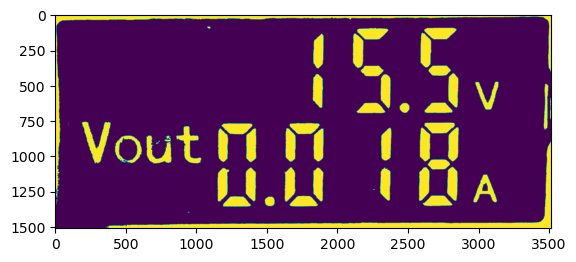

In [6]:
# 使用matplotlib显示图像
plt.imshow(img_binary)

# 显示提取出的主要颜色
os.chdir(r'/Users/hyx020222/Documents/GitHub/NCSLab/Camera')
cv2.imwrite('output.png', img_binary)